# Activity: Hypothesis testing with Python

## **Introduction**


Analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this project, I will be working with historical marketing promotion data. I will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, I will communicate the results to stakeholders. 

In the dataset, each row corresponds to an independent marketing promotion, where the business uses TV, social media, radio, and influencer promotions to increase sales. Stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable us to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


In [168]:
# Import libraries and packages.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [170]:
# RUN THIS CELL TO IMPORT THE DATA.
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Some reasons for conducting an EDA before constructing a simple linear regression mode:** 

* To understand which variables are present in the data
* To consider the distribution of features, such as minimum, mean, and maximum values
* To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
* To identify issues with the data, such as incorrect or missing values.

## **Step 2: Data exploration** 


Using a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

<Axes: xlabel='TV', ylabel='Sales'>

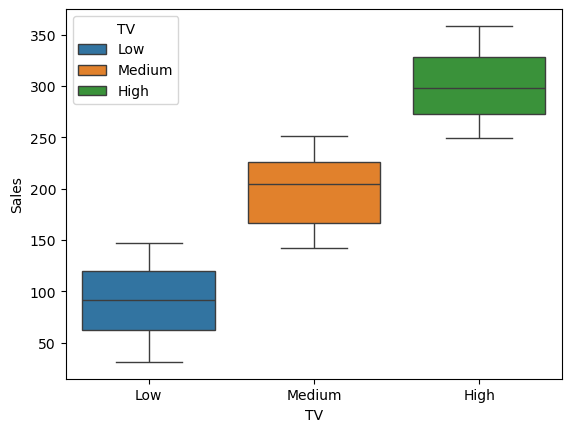

In [177]:
# Create a boxplot with TV and Sales.

sns.boxplot(x='TV',y='Sales', data= data, hue='TV')

There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

Using a boxplot to determine how `Sales` vary based on the `Influencer` size category.

<Axes: xlabel='Influencer', ylabel='Sales'>

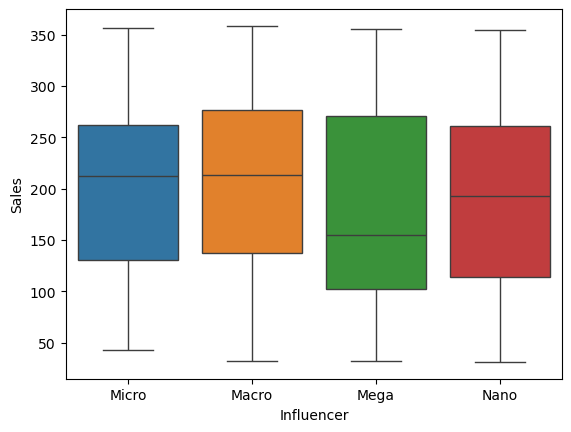

In [248]:
# Create a boxplot with Influencer and Sales.

sns.boxplot(x='Influencer',y='Sales', data = data, hue = 'Influencer')


There is some variation in `Sales` across the `Influencer` groups, but it may not be significant.

### Checking and removing missing data if exist

In [181]:
# Check if there are a null values
print(data.isna().sum())

# Drop rows that contain missing data and update the DataFrame.
data=data.dropna(axis=0)

# Confirm the data contains no missing values.

data.isna().sum()


TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [183]:
data['Sales'].head()

0     90.054222
1    222.741668
2    102.774790
3    328.239378
4    351.807328
Name: Sales, dtype: float64

## **Step 3: Model building** 


Fitting a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`.

In [187]:
# Define the OLS formula.

ols_formula='Sales~C(TV)'
ols_data=data[['Sales','TV']]

# Create an OLS model.

OLS=ols(formula=ols_formula,data=ols_data)

# Fit the model.

model=OLS.fit()

# Save the results summary.

model_summary=model.summary()

# Display the model results.
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          8.81e-256
Time:                        15:27:14   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


* `TV` was selected as the preceding analysis showed a strong relationship between the `TV` promotion budget and the average `Sales`.
* `Influencer` was not selected because it did not show a strong relationship to `Sales` in the analysis.

### Checking model assumptions

**Linearity** 

- Because the model doesn't have any continuous variables the linearity assumption isn't required. 

**independent observation**

- The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

**Normality assumption**

Verifying that the normality assumption is upheld for the model.

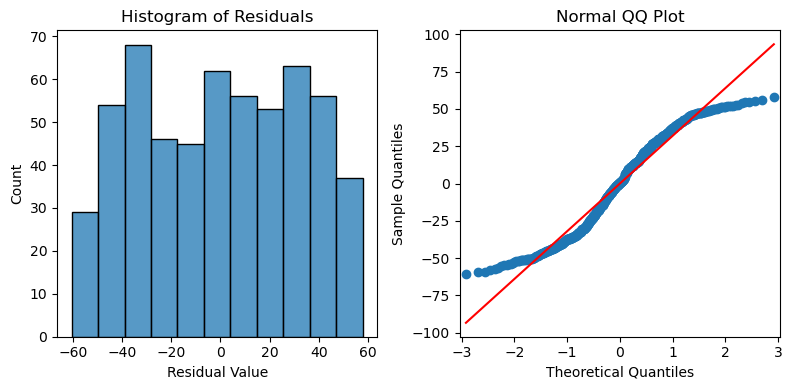

In [189]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

- There is reasonable concern that the normality assumption is not met when `TV` is used as the independent variable predicting `Sales`. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior. 


**Log transformation**

We use log transformation in this case to stabilize variance and reduce the influence of potential outliers, helping to normalize the residuals and improve the linearity of the relationship between independent variables and the dependent variable `Sales`. This transformation allows for better model fitting and interpretation while addressing the non-normality observed in the residuals.

In [191]:
# Apply log transformation
data['Log_Sales'] = np.log(data['Sales'])
data.head(3)

,TV,Radio,Social Media,Influencer,Sales,Log_Sales
0,Low,1.218354,1.270444,Micro,90.054222,4.500412
1,Medium,14.949791,0.274451,Macro,222.741668,5.406013
2,Low,10.377258,0.061984,Mega,102.774790,4.632540


**Model building after the transforamtion**

Building the model again after transforming the depndent variable `Sales` because of the violation of the normallity assumption

In [193]:
# Define the OLS formula.

ols_formula='Log_Sales~C(TV)'
ols_data=data[['Log_Sales','TV']]

# Create an OLS model.

OLS=ols(formula=ols_formula,data=ols_data)

# Fit the model.

model=OLS.fit()

# Save the results summary.

model_summary=model.summary()

# Display the model results.
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Sales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          2.97e-196
Time:                        15:27:30   Log-Likelihood:                -47.077
No. Observations:                 569   AIC:                             100.2
Df Residuals:                     566   BIC:                             113.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.7004      0.020    286.958      0.000       5.661       5.739
C(TV)[T.Low]       -1.2555      0.027    -45.877      0.000      -1.309      -1.202
C(TV)[T.Medium]    -0.4211      0.027    -15.404      0.000      -0.475      -0.367
==============================================================================
Omnibus:                       73.011   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.331
Skew:                          -0.813   Prob(JB):                     4.50e-27
Kurtosis:                       4.573   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Verifying that the normality assumption is upheld for the model `After the transformation`

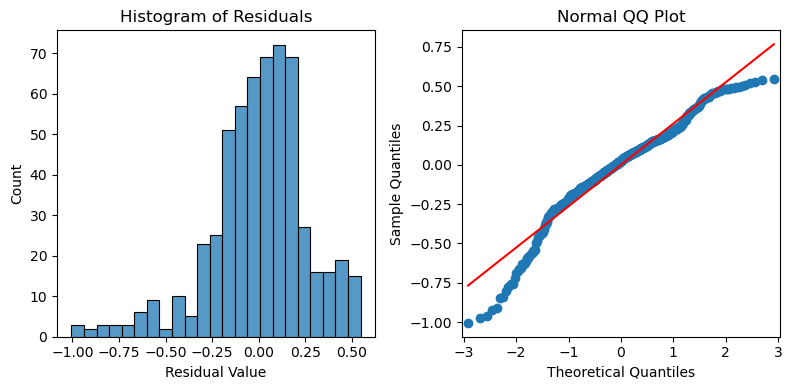

In [195]:
# Calculate the residuals.

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

- The residuals is almost forms a 'bell shape' normally distributed.

**Constant variance `Homoscedasticity` assumption** 

Verifying the constant variance (homoscedasticity) assumption is met for this model.

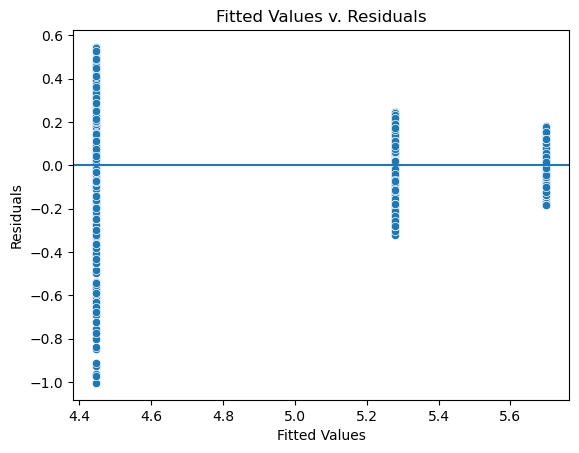

In [197]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot
plt.show()

- The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.

## **Step 4: Results and evaluation** 

Displaying the OLS regression results.

In [199]:
# Display the model results summary.

model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Sales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          2.97e-196
Time:                        15:27:30   Log-Likelihood:                -47.077
No. Observations:                 569   AIC:                             100.2
Df Residuals:                     566   BIC:                             113.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.7004      0.020    286.958      0.000       5.661       5.739
C(TV)[T.Low]       -1.2555      0.027    -45.877      0.000      -1.309      -1.202
C(TV)[T.Medium]    -0.4211      0.027    -15.404      0.000      -0.475      -0.367
==============================================================================
Omnibus:                       73.011   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.331
Skew:                          -0.813   Prob(JB):                     4.50e-27
Kurtosis:                       4.573   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The Interpretation of the model's R-squared**

79.6% of the variation Sales is explained by the variation TV promotion.

**The intepretation of the coefficient estimates**


The coefficient for the "Low" TV category (-1.2555) indicates that sales are approximately 71.51% lower compared to the "High" category, while the "Medium" category (-0.4211) has sales about 34.4% lower than "High." Both coefficients are statistically significant with p-values < 0.0001, meaning the differences in sales between the categories are not due to random chance. Thus, the TV categories have a significant impact on sales in the model.

Note: The percantage is calculated by this formula because the dependent variable was log transformed: (e^-0.4211−1)×100

### Perform a one-way ANOVA test

With the model fitted, I will run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [201]:
# Create an one-way ANOVA table for the fit model.

sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(TV),153.625511,2.0,1105.982761,2.967229e-196
Residual,39.309853,566.0,NaN,NaN


**The null and alternative hypotheses for the ANOVA test**

$H_0$ =The mean of the 3 categories is equal and any difference is due to chance and not statistically significant.

$H_A$ = At least one of the 3 categories is different from the others.

**Conclusion from the one-way ANOVA test**

- The F-test statistic is 1105.98 and the p-value is $2.97 * 10^{-196}$ (i.e., very small). Because the p-value is less than 0.05, I would reject the null hypothesis that 'there is no difference in `Sales` based on the `TV` promotion budget'.

- It tells there is at least one mean is not equal to the others, so there is a statistically significant difference in the sales among the 3 categories of the TV promotions.

### Perform an ANOVA post hoc test

Applying ANOVA post hoc tests `Tukey’s HSD` post hoc test. 

Running the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [203]:
# Perform the Tukey's HSD post hoc test.

tukey_results = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'], alpha=0.05)
tukey_results.summary()



group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


**The interpretation of the Tukey HSD test**

- The all categories rejecting the null hypothesis which is the mean of sales among the 3 categories is equal, so we can conclude that there is a statistically significat difference in the mean of sales among the 3 categories.


- A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

- The results were that `Sales` is not the same between any pair of `TV` groups. 

## **Conclusion**



**Key Insights**

- Sales Variation: 79.6% of the variation in Sales is explained by differences in TV promotion categories.

- Impact of TV Categories: Sales are approximately 71.51% lower for the "Low" TV category and 34.4% lower for the "Medium" category compared to "High." These differences are statistically significant (p < 0.0001).

- Statistical Significance: The results of both the one-way ANOVA and Tukey’s HSD tests confirm significant differences in Sales between TV promotion categories.

**Summary for Stakeholder**

The analysis shows that 79.6% of the variation in Sales can be attributed to differences in TV promotion categories. Sales in the "Low" TV category are approximately 71.51% lower, and sales in the "Medium" category are about 34.4% lower compared to the "High" category. The model is a reliable predictor of Sales with an R-squared value of 0.796. Statistical tests, including one-way ANOVA and Tukey’s HSD, confirm significant differences between all TV promotion categories, meaning TV promotion has a substantial impact on sales.

#### **Reference**
[Saragih, H.S. *Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)